#### **Exercise 1:**

The `titanic` dataset is widely used in ML courses.  The 'stakeholder problem' is to predict whether or not a person was likely to survive given the available data.  We'll use it here for a few problems to get used to pre-processing. First, let's do some EDA.  Load the data in and use a scatter plot matrix to visualize just the numeric columns.  Look critically at your results.  What have you learned?  What would you like to know that this analysis doesn't tell you?

In [5]:
import pandas as pd

titanic = pd.read_csv('/workspaces/707-lecture-master/2-week2/data/titanic.csv')

from pandas.plotting import scatter_matrix


#titanic.hist(bins=50, figsize=(12,8))

In [29]:
titanic.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0


In [32]:
titanic['embarked']

0       S
1       S
2       S
3       S
4       S
       ..
1304    C
1305    C
1306    C
1307    C
1308    S
Name: embarked, Length: 1306, dtype: object

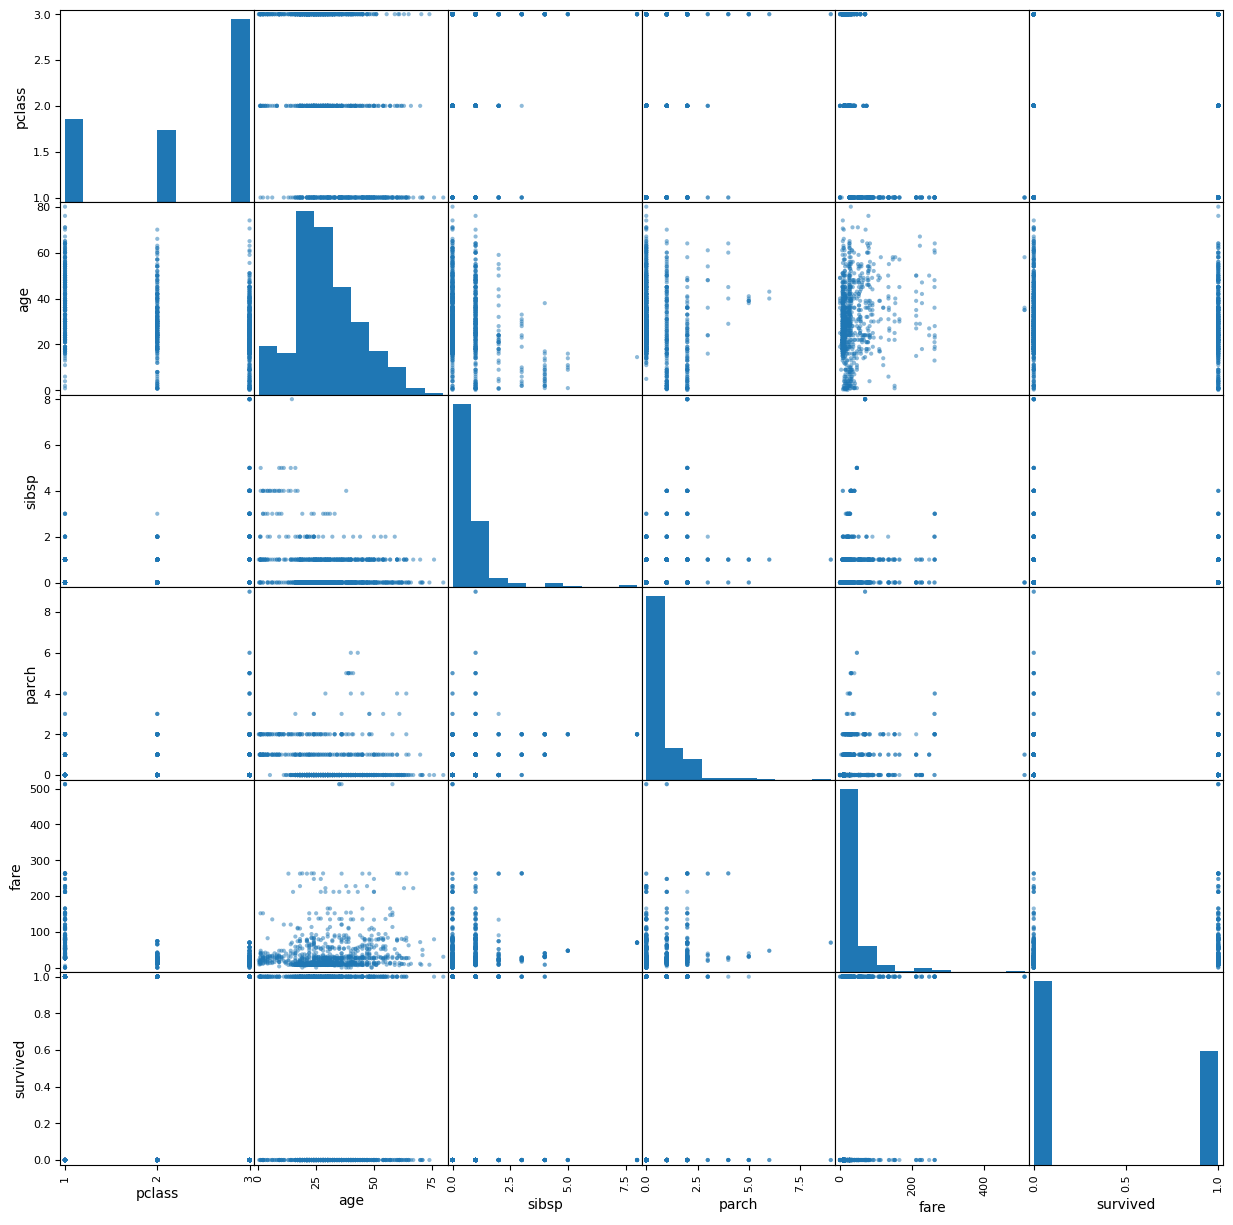

In [10]:
import matplotlib.pyplot as plt
pd.plotting.scatter_matrix(titanic, figsize=(15,15))
plt.show()

#### **Exercise 2:**

It's zero cost to build a scatter matrix, but sometimes it only helps to highlight what you *don't* know. In addition to identifying correlations (or lack thereof) we'd also like to get a sense of the predictive power of different features.  Figure out how to use histogram plots to look at survival rates by age, pclass, and gender.

array([[<Axes: title={'center': 'pclass'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'sibsp'}>,
        <Axes: title={'center': 'parch'}>],
       [<Axes: title={'center': 'fare'}>,
        <Axes: title={'center': 'survived'}>]], dtype=object)

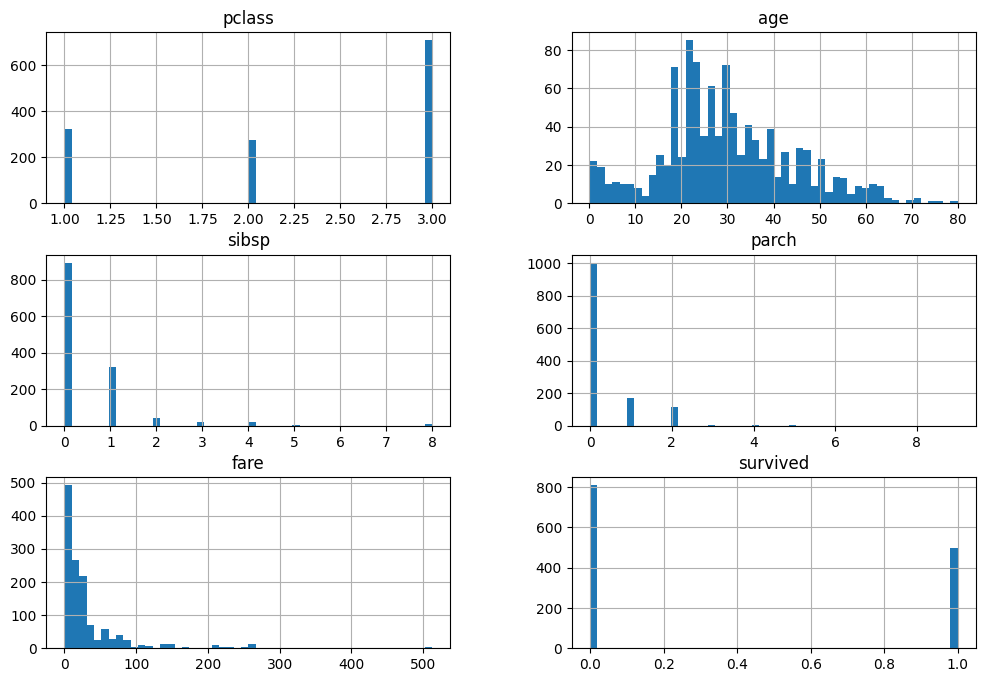

In [8]:
titanic.hist(bins=50, figsize=(12,8))

<Axes: xlabel='age', ylabel='Count'>

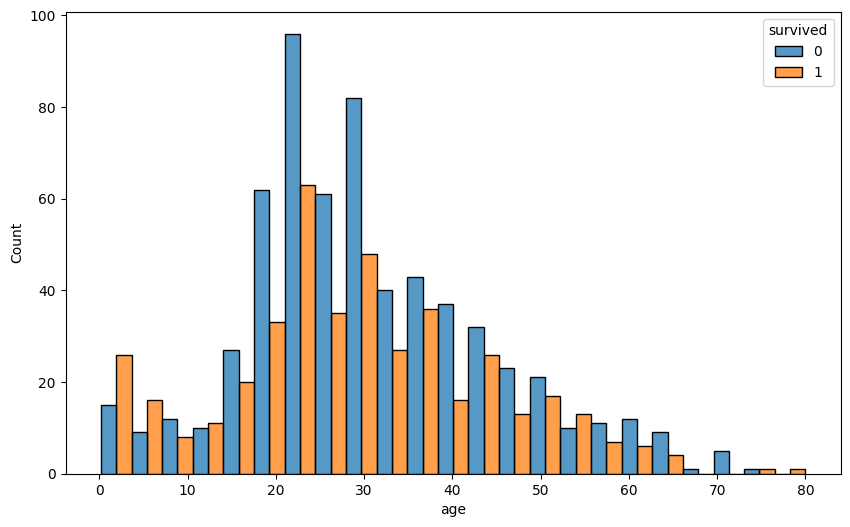

In [12]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=titanic, x='age', hue='survived',multiple='dodge')

<Axes: xlabel='pclass', ylabel='Count'>

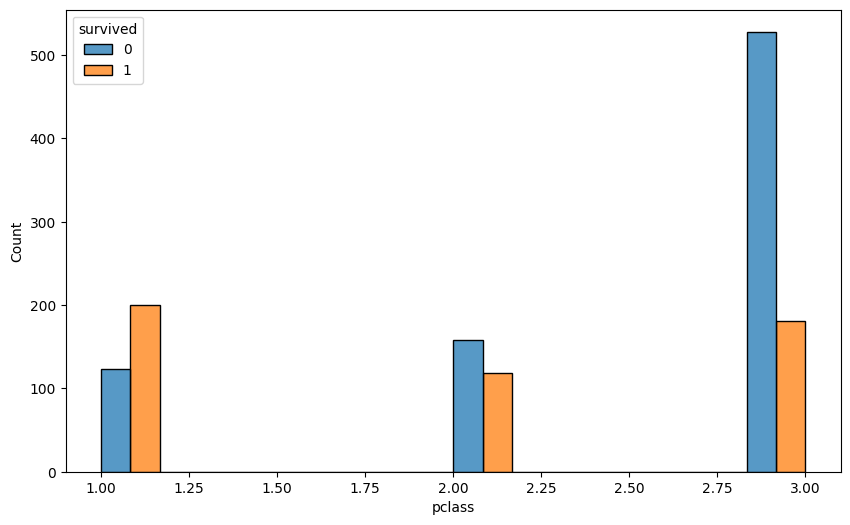

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data=titanic, x='pclass', hue='survived',multiple='dodge')

<Axes: xlabel='sex', ylabel='Count'>

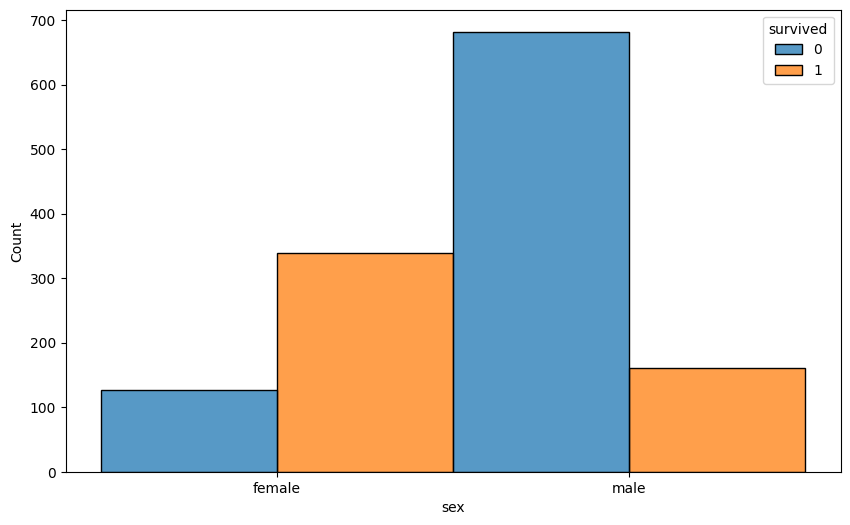

In [16]:
plt.figure(figsize=(10,6))
sns.histplot(data=titanic, x='sex', hue='survived',multiple='dodge')

#### **Exercise 3:**

Examine your data for NAs.  For the features that you think are likely to matter given your initial analysis, use an imputer to fill in the missing values. For features that you think are of minimal importance and / or have too many NAs to make imputation feasible, drop those features.

In [43]:
titanic.isna().sum()

pclass        0
name          0
age           0
sibsp         0
parch         0
ticket        0
fare          0
survived      0
sex_male      0
embarked_Q    0
embarked_S    0
dtype: int64

In [21]:
null_rows_idx = titanic.isnull().any(axis=1)
titanic.loc[null_rows_idx].head()

titanic.drop(['cabin'], axis=1, inplace=True)
titanic

,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S,0
...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C,0
1305,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C,0
1306,3,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C,0
1307,3,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C,0


In [24]:
median = titanic["age"].median()
#median
titanic["age"].fillna(median, inplace=True) 


In [27]:
titanic.dropna(inplace=True)

#### **Exercise 4**

Recall that sklearn does not handle strings.  Use an encoder to transform any string columns into numbers. If there are any categorical columns where label encoding won't work, use a one-hot encoder.

In [ ]:
titanic.drop(['name'],axis=1,inplace=True)



In [40]:
titanic2 = titanic.copy()

titanic2 = pd.get_dummies(titanic2, columns=['sex','embarked'], drop_first=True)
titanic2

,pclass,name,age,sibsp,parch,ticket,fare,survived,sex_male,embarked_Q,embarked_S
0,1,"Allen, Miss. Elisabeth Walton",29.0000,0,0,24160,211.3375,1,False,False,True
1,1,"Allison, Master. Hudson Trevor",0.9167,1,2,113781,151.5500,1,True,False,True
2,1,"Allison, Miss. Helen Loraine",2.0000,1,2,113781,151.5500,0,False,False,True
3,1,"Allison, Mr. Hudson Joshua Creighton",30.0000,1,2,113781,151.5500,0,True,False,True
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",25.0000,1,2,113781,151.5500,0,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"Zabour, Miss. Hileni",14.5000,1,0,2665,14.4542,0,False,False,False
1305,3,"Zabour, Miss. Thamine",28.0000,1,0,2665,14.4542,0,False,False,False
1306,3,"Zakarian, Mr. Mapriededer",26.5000,0,0,2656,7.2250,0,True,False,False
1307,3,"Zakarian, Mr. Ortin",27.0000,0,0,2670,7.2250,0,True,False,False


In [59]:
titanic2.drop(['ticket'], axis=1, inplace=True)

In [51]:
titanic2.drop(['name'],axis=1, inplace=True)

In [60]:
X = titanic2.drop(['survived'], axis = 1)
y = titanic2['survived']

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)


#### **Exercise 5**

Using 5-fold cross-validation, compare the performance of a LogisticRegression classifier with that of a DecisionTree classifier.

_Note, the following exercises use the housing data introduced in this week's lecture notes._

In [63]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

logistic_clf = LogisticRegression()
decision_tree_clf = DecisionTreeClassifier()

score = cross_val_score(logistic_clf, X,y, cv=5)
score.mean()

/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

0.7198882746921704

In [64]:
score = cross_val_score(decision_tree_clf, X,y, cv=5)
score.mean()

0.6494428358339913

#### **Exercise 6:** 

Using the housing data introduced with the end-to-end example this week, try a Support Vector Machine regressor (`sklearn.svm.SVR`) with various hyperparameters, such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Note that SVMs don't scale well to large datasets, so you should probably train your model on just the first 5,000 instances of the training set and use only 3-fold cross-validation, or else it will take hours. Don't worry about what the hyperparameters mean for now (see the [documentation](https://scikit-learn.org/stable/modules/svm.html) if you are interested). Use GridSearchCV to explore the parameter space. How does the best `SVR` predictor perform?

#### **Exercise 7:**

Try replacing the `GridSearchCV` with a `RandomizedSearchCV`.

#### **Exercise 8:**

Try adding a `SelectFromModel` transformer in the preparation pipeline to select only the most important attributes.  Use a `RandomForestRegressor` to drive the feature selection process.